In [1]:
import subprocess
import os
import utils as ul
import copy
import pickle
import gzip

dir1 = os.getcwd()
os.chdir('/data/inspur_disk03/userdir/caoxy/eboss_lya/data/2')
dir2 = os.getcwd()

output = subprocess.Popen(['ls','-l'],stdout=subprocess.PIPE,shell=True)
lines = output.stdout.read().splitlines()
lines = [line.decode("utf-8") for line in lines]

In [2]:
import h5py
import pickle
import gzip
import numpy as np
ii = 0
tot_gal = 0
n_lrg = 0
ourput_dir = "/home/cao/fb/lrg_cont_spec_data"
for h5_file in lines[:]:
    try:
        #print(h5_file)
        with h5py.File(h5_file, 'r') as f:
            arr0 = f['flux']
            flux_arr = arr0[:]
            
            arr1 = f['zans']
            zans_arr = arr1[:]
            
            plug = f['plug']
            plug_arr = plug[:]
            
            res_ivar = f['res_ivar'] 
            res_ivar_arr = res_ivar[:]
            
            loglam = f['loglam']
            loglam_arr = loglam[:] 
            
            syn_flux = f['newsynflux']
            syn_flux_arr = syn_flux[:]
        
        z_arr = np.array([item[-9]for item in zans_arr])
        #plate_arr = np.array([item[0]for item in zans_arr])
        #mjd_arr = np.array([item[2]for item in zans_arr])
        fiber_arr = np.array([item[3]for item in zans_arr])
        
        id_lrg = []
        for kk in range(plug_arr.size):
            src_type = plug_arr[kk][18]
            src_type = src_type.decode("utf-8")
            src_type = src_type.replace(" ", "")
            
            struct = zans_arr[kk]
            obj_class = struct[10] 
            #print('---',obj_class)
            
            if (src_type == 'LRG') and (obj_class == 'GALAXY'):
                n_lrg += 1
                id_lrg.append(kk)
        
        tot_gal += flux_arr.shape[0]
        ii += 1
        if ii%100 == 0:
            print('{} number of file has benn read'.format(ii))
        
        #write spec info
        
        if len(id_lrg) > 0:
            out_struct = {'ivar':res_ivar_arr[id_lrg,:],'cont_flux':syn_flux_arr[id_lrg,:], 'flux': flux_arr[id_lrg,:], 
                          'z':z_arr[id_lrg],'loglam':loglam_arr,
                          'plate':zans_arr[0][0], 'mjd':zans_arr[0][2], 'fiber': fiber_arr[id_lrg]}
            outname = "{}/{}.hdf5".format(ourput_dir,h5_file[0:-3])
            #print(outname)
            #pickle.dump(out_struct,gzip.open(outname,'wb'))
            with h5py.File(outname, "w") as f:
                for key,item in out_struct.items():
                    f.create_dataset(key, data=item)
                
    except:
        print(h5_file)
    if tot_gal > 300000:
        continue

100 number of file has benn read
200 number of file has benn read
300 number of file has benn read
400 number of file has benn read
500 number of file has benn read
600 number of file has benn read
700 number of file has benn read
800 number of file has benn read
900 number of file has benn read
1000 number of file has benn read
1100 number of file has benn read
1200 number of file has benn read
1300 number of file has benn read
5017_55715.h5
5018_55734.h5
1400 number of file has benn read
1500 number of file has benn read
1600 number of file has benn read
1700 number of file has benn read
1800 number of file has benn read
1900 number of file has benn read
2000 number of file has benn read
2100 number of file has benn read
2200 number of file has benn read
2300 number of file has benn read
2400 number of file has benn read
6783_56284.h5
2500 number of file has benn read
6931_56388.h5
2600 number of file has benn read
2700 number of file has benn read
7379_56713.h5
2800 number of file h

In [94]:
print('Total number of LRG {}'.format(n_lrg))
print('Total number of file {}'.format(tot_gal))

Total number of LRG 197
Total number of file 200


('1----', (146, 4607), (146, 4607), (4607,), (146,))


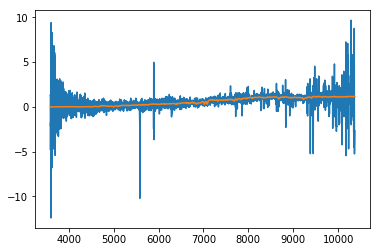

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import h5py

with h5py.File('/home/cao/fb/lrg_cont_spec_data/9369_58054.hdf5', 'r') as f:
    ivar = f['ivar'][()]  #inverse variance (i.e 1/noise**2)
    cont_flux = f['cont_flux'][()]  #the continuum spectrum of objects, which is got through PCA template fit
    flux = f['flux'][()]  #the spectrum of objects
    z = f['z'][()]  #redshift of objects
    loglam = f['loglam'][()]  #log10(wavelength)
    plate = f['plate'][()]  #sdss-plate
    mjd = f['mjd'][()]  #sdss-mjd
    fiber = f['fiber'][()]  #sdss-fiber
    
print('1----', flux.shape, cont_flux.shape, loglam.shape, z.shape)
#in this file, we have 146 diffrent lrg galaxies, 
#the spectrum of each of them is saved into an 1d-array(size 4607)
plt.plot(10**loglam,flux[130,:])
plt.plot(10**loglam, cont_flux[130,:])
plt.show()

(-1, 2)

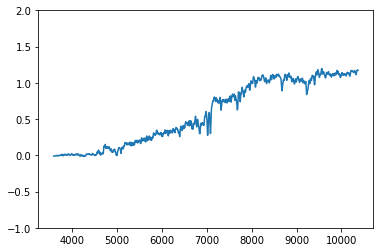

In [11]:
plt.figure()
plt.plot(10**loglam, cont_flux[130,:])
plt.ylim(-1,2)

In [7]:
outname

'/home/cao/fb/lrg_cont_spec_data/9369_58054.hdf5'

In [67]:
8*5000*3*1e5 / (8*1024*1024*1024)

1.3969838619232178

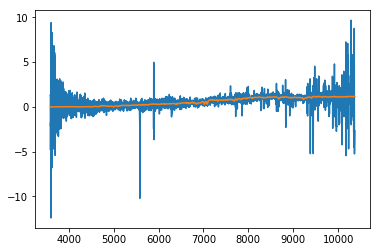

In [3]:
from matplotlib import pyplot as plt
plt.plot(10**out_struct['loglam'],out_struct['flux'][130,:])
plt.plot(10**out_struct['loglam'],out_struct['cont_flux'][130,:])

In [97]:
print("plate={}&mjd={}&fiber={}#".format(out_struct['plate'], out_struct['mjd'], out_struct['fiber'][130]))

plate=10000&mjd=57346&fiber=625#


In [98]:
out_struct['z'][130]

0.70906264

In [48]:
len(id_lrg)

197

In [ ]:
out